Linear models are a useful means of showing the relationship between two quantities, but oftentimes a linear model is not sufficient to make novel and accurate predictions.  As such, we want to discover trends without assuming linearity.  But how are we to transition from a straight line to a smooth curve?  The answer is that a smooth curve can be interpreted as collection of many small lines.

### Locally Weighted Regression - Loess

One way of interpreting this collection of many small lines is through loess, which is form of nonparametric regression.  Although there are local parametric assumptions, such that local predictions can be linear but global predictions are nonlinear.

### Linear Regression

The main idea of linear regression is the assumption that:

$$\large y = X\cdot\beta +\sigma\epsilon $$

...where $y$ is our target dependent variable and $X$ is our predictive independent variable(s).

If we pre-multiply this equation with a matrix of weights we get:

$$\large W_i y = W_i X\cdot\beta +\sigma W_i \epsilon $$

The independent observations are the rows of the matrix $X$.  Each row has a number of columns (this is the number of features) and we can denote it by $p$.  The distance between two data points or independent observations is the Euclidean distance between the two represented $p-$dimensional vectors.  The Euclidean distance is also known as the $L^2$ norm.  The equation is:

$$dist(\vec{v},\vec{w})=\sqrt{(v_1-w_1)^2+(v_2-w_2)^2+...+(v_p-w_p)^2}$$

We shall have $n$ different weight vectors because we have $n$ different observations.

All in all, linear regression can be seen as a linear combination of the observed outputs (values of the dependent variable) and the predictions we make are linear combinations of the actual observed values of the dependent variables.

### Comparision with loess

So for loess, $\hat{y}$ (our prediction) is obtained as a different linear combination of the values of $y$.  The loess model does not learn a fixed set of parameters ($\beta$) like linear regression does. Instead, parameters are determined for each individual $x$. While $\beta$ is calculated, larger weights are given to the points in the training set lying closer to $x$ than to the points lying farther away from $x$.

### Random Forest Regression

The random forest regression is an ensemble bagging algorithm that combines and averages the outputs of multiple decision trees.  It is a desirable method because it tends to have a reduced risk of overfitting and is more suited for determining the relative importances of features; however, on noisier data it has a higher risk of overfitting.  This is also a nonparametric model and though it is popular machine learning method, loess seems to be a strong competitor. 


To compare the effectiveness of each nonlinear model, I will be performing a univariate analysis using each model on the Boston Housing Prices.csv dataset, which lists the median house prices (categorical dependent variable) of many homes in the Boston area, along with 16 predictor attributes (4 categorical and 12 numerical independent variables).  I will be performing a univariate analysis of the 'rooms' predictor (number of rooms) on the 'cmedv' target.

In [1]:
# Import libraries and models
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [2]:
# High-resolution images
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 120

In [3]:
# Mount Google Drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
data = pd.read_csv('drive/MyDrive/Data/Boston Housing Prices.csv')
data.head(5)

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

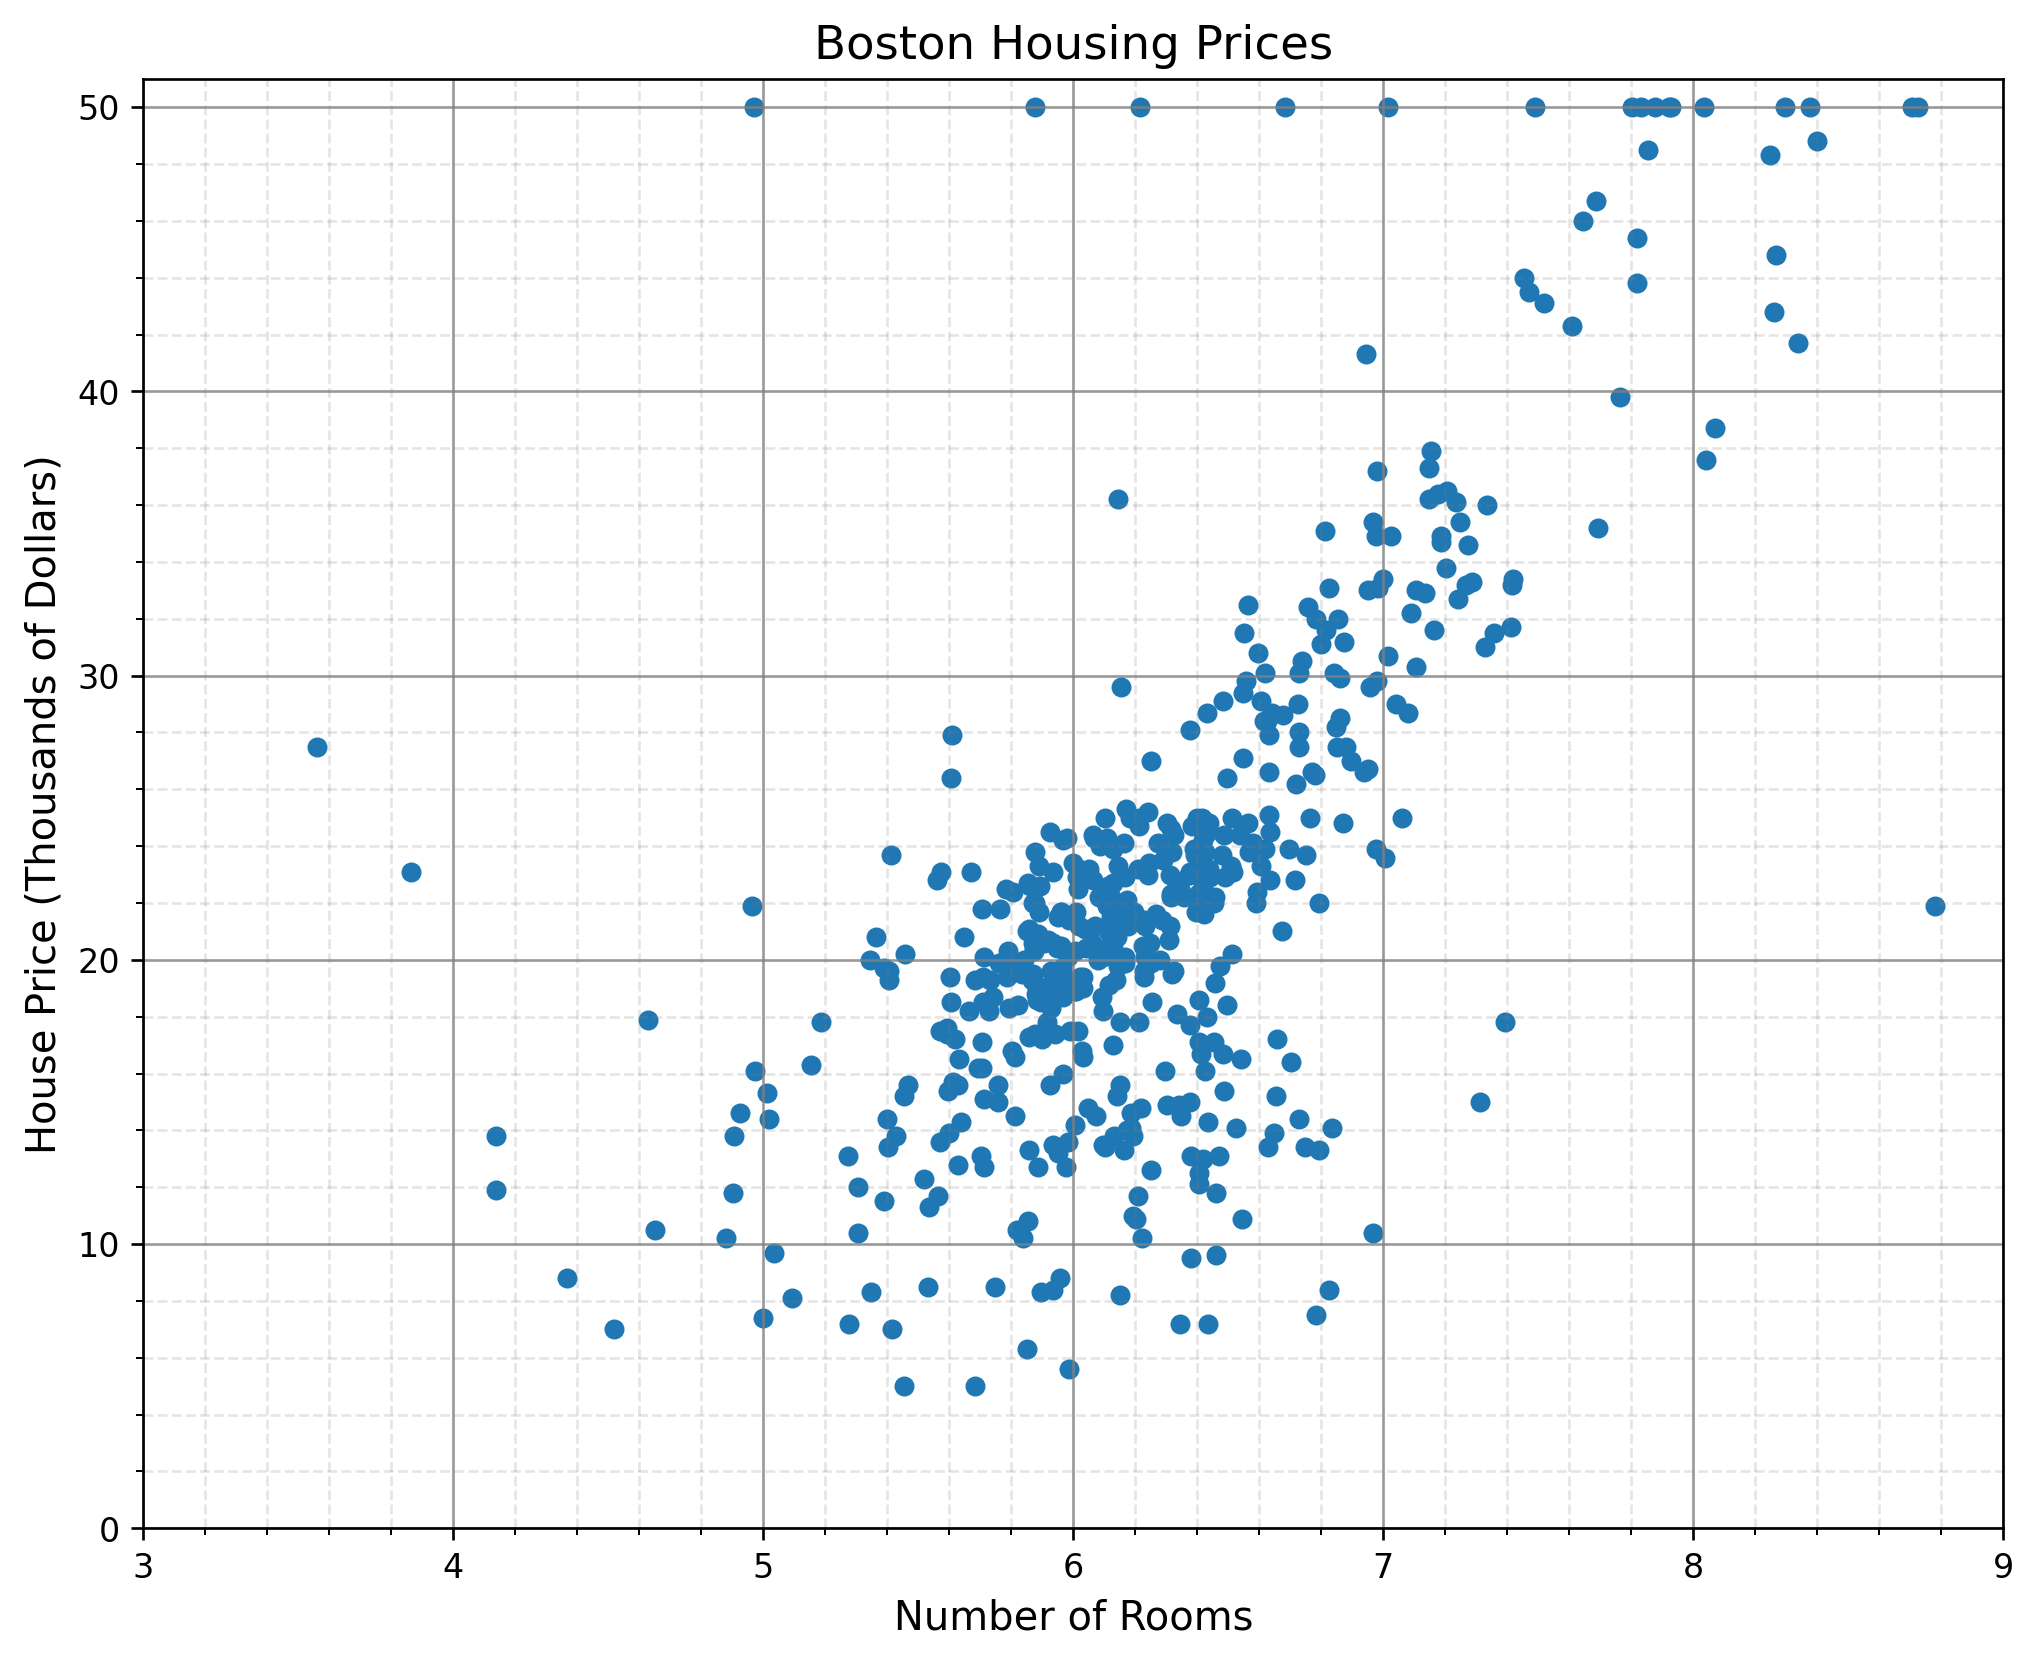

In [5]:
# Select variables and plot data
x = data['rooms'].values
y = data['cmedv'].values

# Data plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=x, y=y,s=25)
ax.set_xlabel('Number of Rooms',fontsize=12)
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=12)
ax.set_title('Boston Housing Prices',fontsize=14)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.savefig('RoomVsCMedV.png')
files.download('RoomVsCMedV.png')
plt.show()

As we can see from the scatterplot, though in an overall sense, as the number of rooms increases the median house price tends to increase, the data is decidedly nonlinear.  Because of this, it will likely be the case that our linear model will make relatively inaccurate predictions.

In [6]:
# Define data standardization and cross-validation methods
k = 10

ss = StandardScaler()
kf = KFold(n_splits=k, shuffle=True, random_state=410)

In [21]:
# Define imported model execution function
def DoKFold(model, x , y, scaler=ss, split=kf):
  pred_mse = []

  for idxTrain, idxTest in kf.split(x, y):
    xtrain = ss.fit_transform(x[idxTrain].reshape(-1,1))
    xtest = ss.transform(x[idxTest].reshape(-1,1))
    ytrain = y[idxTrain]
    ytest = y[idxTest]

    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    pred_mse.append(mse(ytest, ypred))

  A = np.column_stack([xtest,ypred])
  A = A[np.argsort(A[:,0])]
        
  return A, xtest, ytest, pred_mse

In [9]:
# Linear model

ols = LinearRegression()

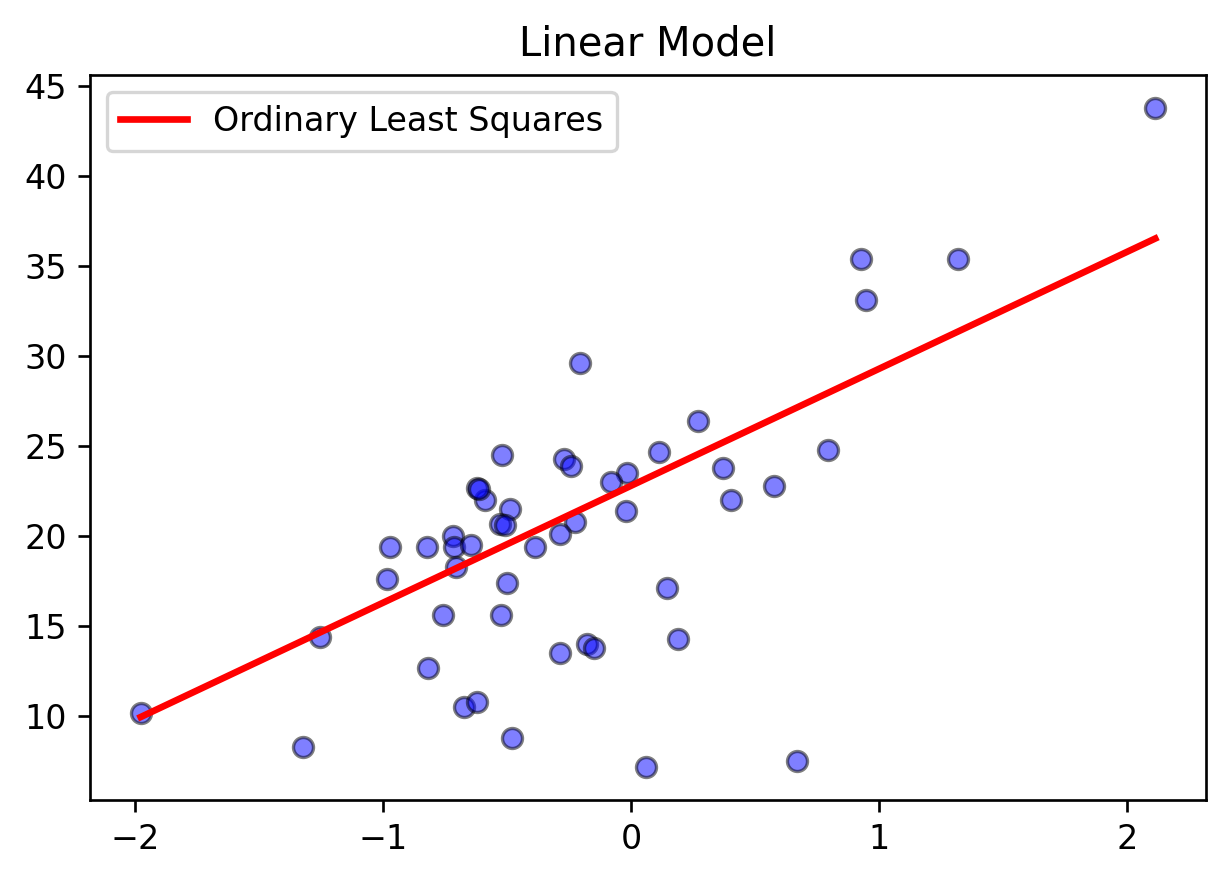

The MSE for the Ordinary Least Squares Linear Regression is: 44.28641009426175


In [34]:
# Ordinary Least Squares
L, xtest_ols, ytest_ols, mse_ols = DoKFold(ols, x, y)

# Model plot
plt.scatter(xtest_ols, ytest_ols, color='blue', alpha=.5, edgecolors='k')
plt.plot(L[:,0], L[:,1], color='red', lw=2, label='Ordinary Least Squares')
plt.title('Linear Model')
plt.legend()
plt.show()

print('The MSE for the Ordinary Least Squares Linear Regression is: ' + str(np.mean(mse_ols)))

Certainly the linear model reflects an overall trend, but we want to create a model that is capable of predicting a greater portion of the median house prices based on the number of rooms with greater specificity, such that it is better fit to the data on which we will train it.

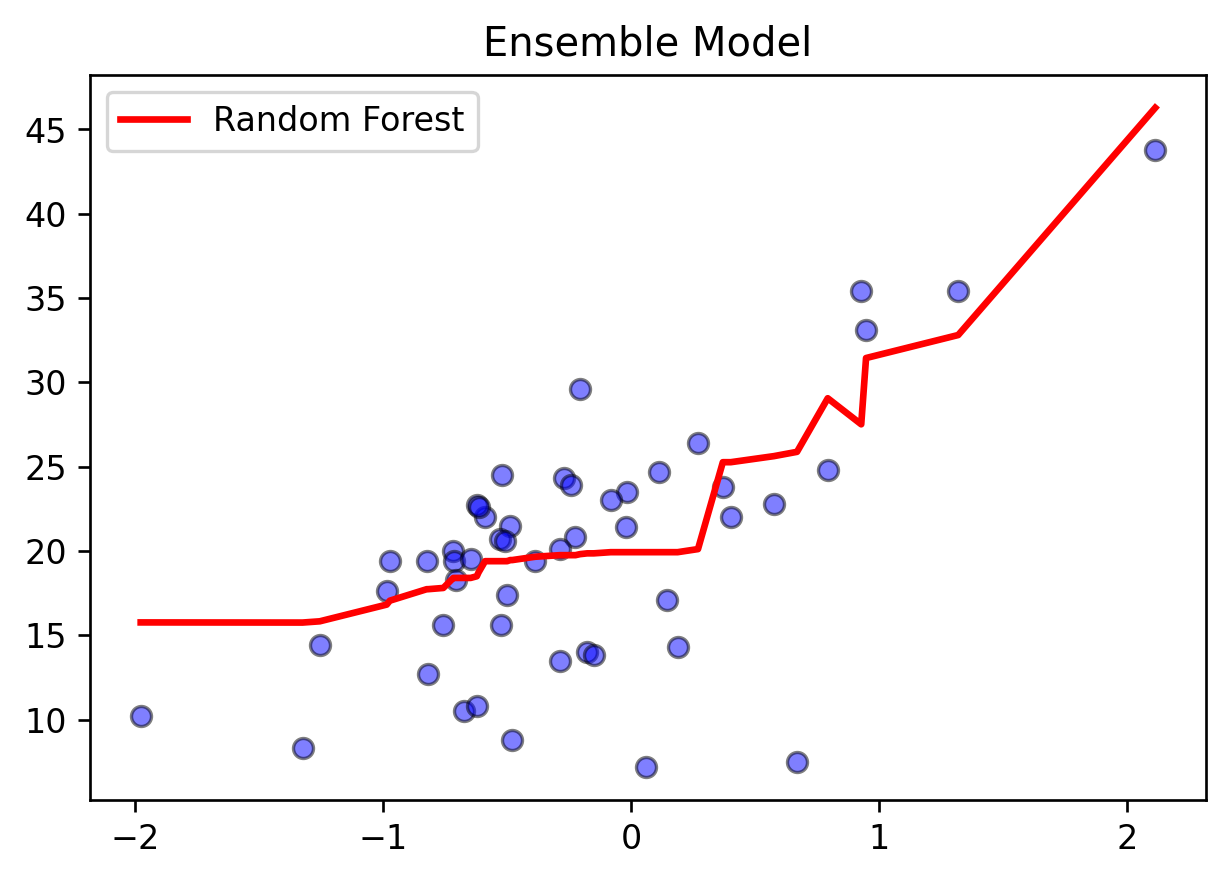

Optimal number of estimator trees in range tested:  45
The MSE for the Random Forest Regression is:  35.51087903147884


In [33]:
# Random Forest Regression
num_est = np.arange(30, 51, 1)
max_depth = 3
min_split = 2

te_num_est = []
mse_rfr = []

for n in num_est:
  rfr = RandomForestRegressor(n_estimators=n, max_depth=max_depth, 
                              min_samples_split=min_split)
  F, xtest_rfr, ytest_rfr, yhat_mse_rfr = DoKFold(rfr, x, y, 'Random Forest', 'Ensemble')
    
  mse_rfr.append(np.mean(yhat_mse_rfr))
  te_num_est.append(n)

idx_min_rfr = np.argmin(mse_rfr)

# Model plot
plt.scatter(xtest_rfr, ytest_rfr, color='blue', alpha=.5, edgecolors='k')
plt.plot(F[:,0], F[:,1], color='red', lw=2, label='Random Forest')
plt.title('Ensemble Model')
plt.legend()
plt.show()

print('Optimal number of estimator trees in range tested: ', te_num_est[idx_min_rfr])  
print('The MSE for the Random Forest Regression is: ', mse_rfr[idx_min_rfr])

The ensemble model certainly predicts the the trend of the relationship between the number of rooms and median house price with greater precision.  But since the data, though nonlinear, has undertones of linearity, I suspect loess will be a better model.

Perhaps the most important aspect of loess is the weights.  I will test 3 different kernelling methods for loess: tricubic, Epanechnikov, and quartic.  Each kernel has a specific bandwith with which a given neigborhood of data points will be interpolated.

In [26]:
# Define kernels

# Tricubic Kernel
def Tricubic(x):
  if len(x.shape) == 1:
    x = x.reshape(-1,1)
  d = np.sqrt(np.sum(x**2,axis=1))
  return np.where(d>1,0,70/81*(1-d**3)**3)

# Epanechnikov Kernel
def Epanechnikov(x):
  return np.where(np.abs(x)>1,0,3/4*(1-np.abs(x)**2)) 

# Quartic Kernel
def Quartic(x):
  return np.where(np.abs(x)>1,0,15/16*(1-np.abs(x)**2)**2) 

This animation is from the scikit-lego documentation.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1bQmo-j35etyEWt7Ce8TSo01YSOhZQBeY'width='800px'/>
<figcaption>Example of how weights work</figcaption></center>
</figure>

As the model runs, groupings of data points are weighted according to the progression of the weight function at the given time.

In [25]:
# Smoother model

def lwr(x, y, xnew, kern, tau):
    n = len(x)
    yest = np.zeros(n)   
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])     

    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)], [np.sum(weights * x), np.sum(weights * x * x)]])
        beta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = beta[0] + beta[1] * x[i]

    f = interp1d(x, yest, fill_value='extrapolate')

    return f(xnew)

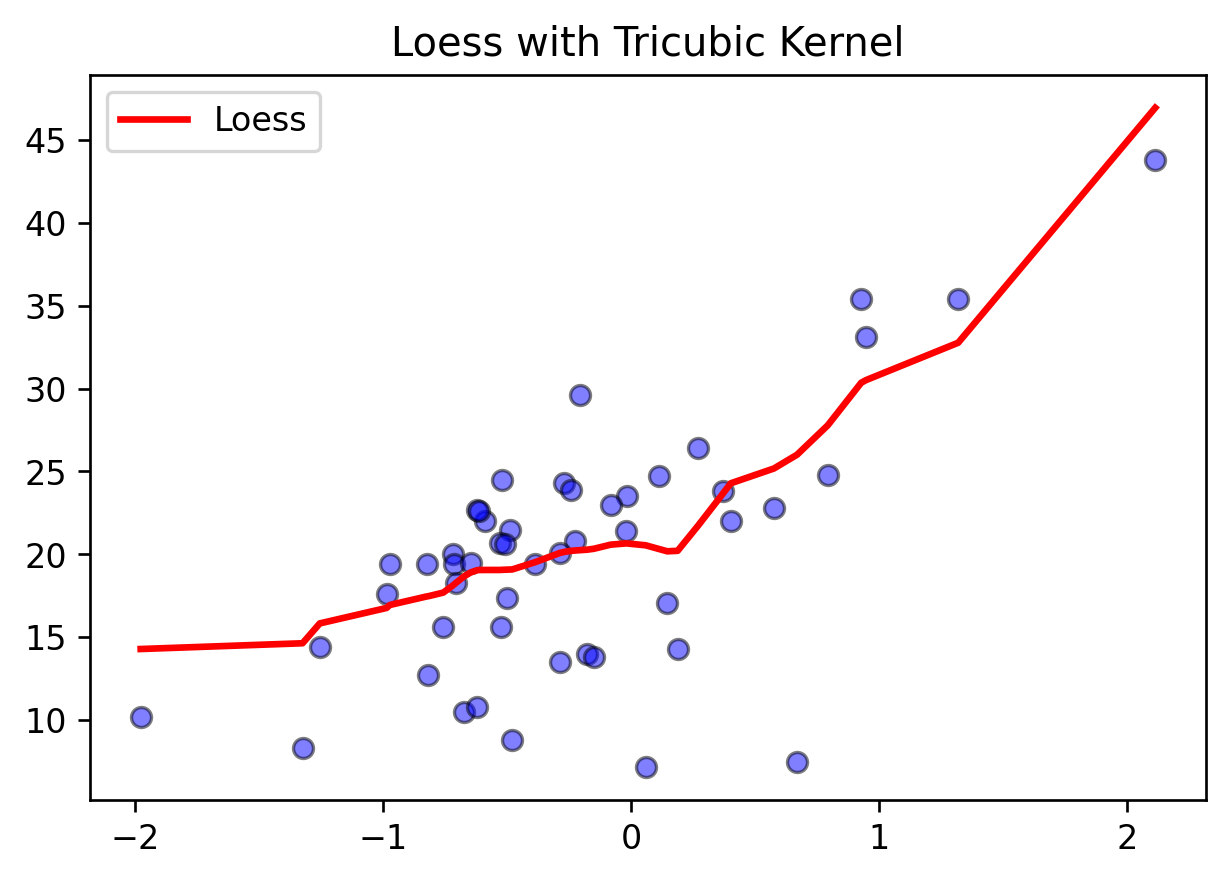

Optimal Tau in range tested:  0.09999999999999999
The MSE for the Locally Weighted Regression is:  15.580597196050634


In [35]:
# Locally Weighted Regression

# Tricubic
tau = np.arange(.01, .11, .01)

mse_lwr_tri = []
te_tau_tri = []

for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = ss.fit_transform(xtrain.reshape(-1,1))
  xtrain = xtrain.ravel()

  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = ss.transform(xtest.reshape(-1,1))
  xtest = xtest.ravel()


  for t in tau:
    yhat_lwr_tri = lwr(xtrain,ytrain,xtest,Tricubic,t)
    mse_lwr_tri.append(mse(ytest, yhat_lwr_tri))
    te_tau_tri.append(t)

  T = np.column_stack([xtest,yhat_lwr_tri])
  T = T[np.argsort(T[:,0])]

idx_min_lwr = np.argmin(mse_lwr_tri)

# Model plot 
plt.scatter(xtest, ytest, color='blue', alpha=.5, edgecolors='k')
plt.plot(T[:,0], T[:,1], color='red', lw=2, label='Loess')
plt.legend()
plt.title('Loess with Tricubic Kernel')
plt.show()

print('Optimal Tau in range tested: ', te_tau_tri[idx_min_lwr])
print('The MSE for the Locally Weighted Regression is: ', mse_lwr_tri[idx_min_lwr])

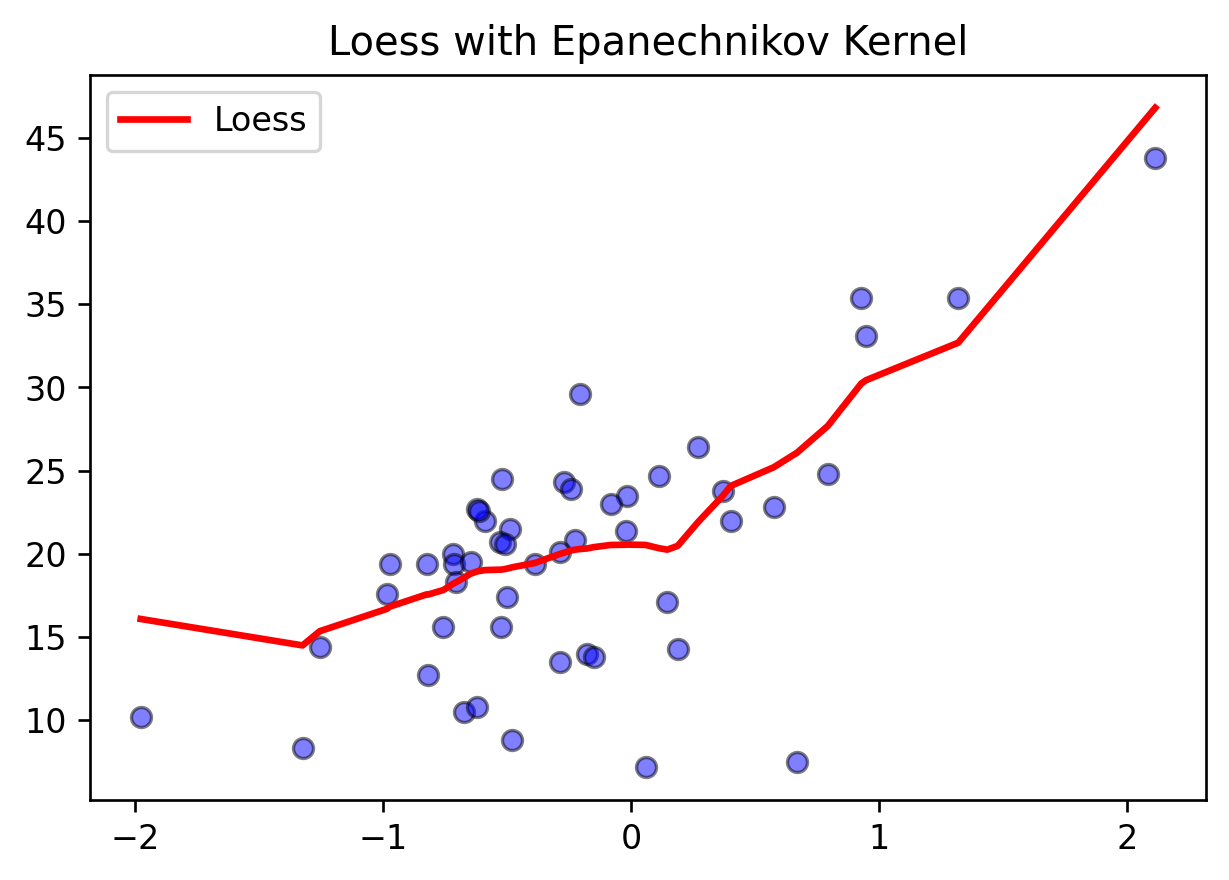

Optimal Tau in range tested:  0.09
The MSE for the Locally Weighted Regression is:  15.660251150735611


In [28]:
# Locally Weighted Regression

# Epanechnikov

tau = np.arange(.01, .11, .01)

mse_lwr_epa = []
te_tau_epa = []

for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = ss.fit_transform(xtrain.reshape(-1,1))
  xtrain = xtrain.ravel()

  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = ss.transform(xtest.reshape(-1,1))
  xtest = xtest.ravel()


  for t in tau:
    yhat_lwr_epa = lwr(xtrain,ytrain,xtest,Epanechnikov,t)
    mse_lwr_epa.append(mse(ytest, yhat_lwr_epa))
    te_tau_epa.append(t)

  E = np.column_stack([xtest,yhat_lwr_epa])
  E = E[np.argsort(E[:,0])]

idx_min_lwr = np.argmin(mse_lwr_epa)
# Model plot
plt.scatter(xtest, ytest, color='blue', alpha=.5, edgecolors='k')
plt.plot(E[:,0], E[:,1], color='red', lw=2, label='Loess')
plt.legend()
plt.title('Loess with Epanechnikov Kernel')
plt.show()

print('Optimal Tau in range tested: ', te_tau_epa[idx_min_lwr])
print('The MSE for the Locally Weighted Regression is: ', mse_lwr_epa[idx_min_lwr])

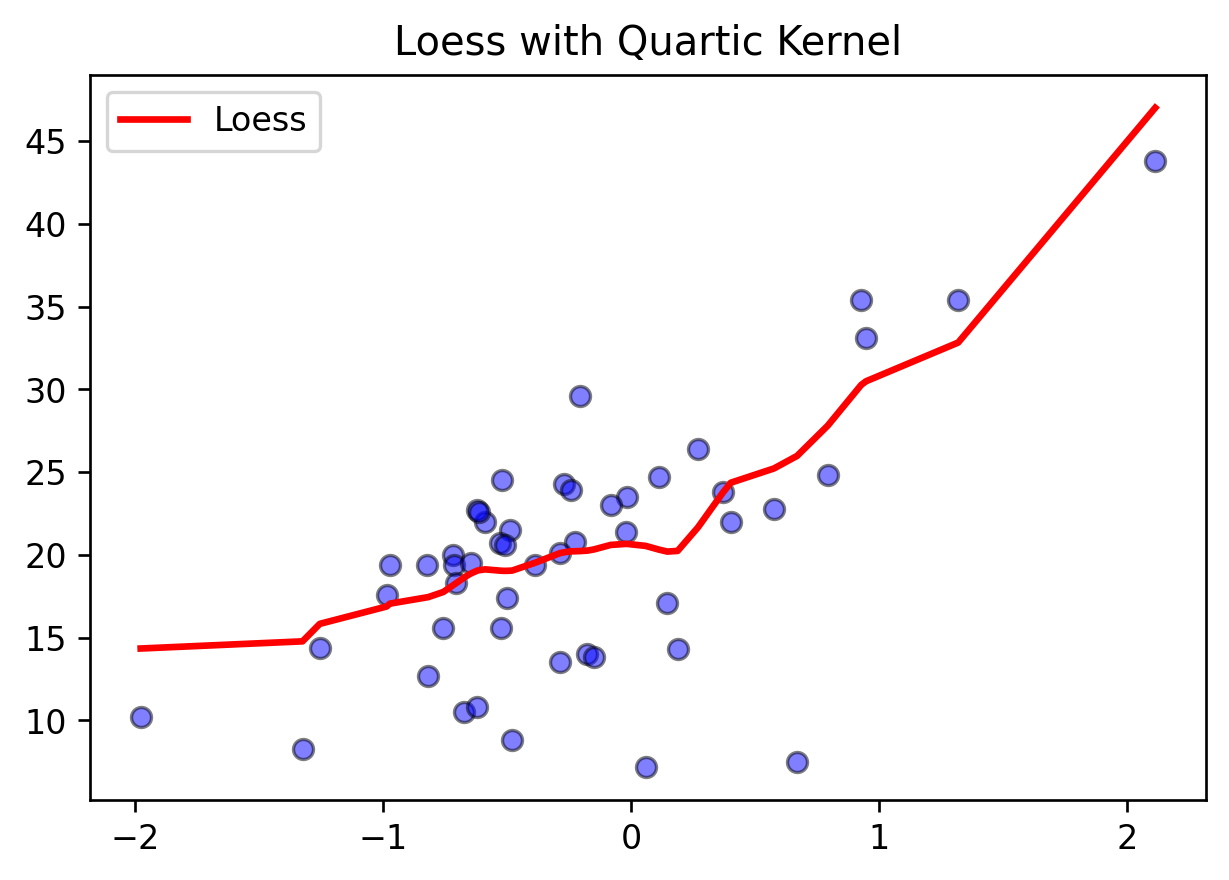

Optimal Tau in range tested:  0.09999999999999999
The MSE for the Locally Weighted Regression is:  15.684994438470044


In [29]:
# Locally Weighted Regression

# Quartic
tau = np.arange(.01, .11, .01)

mse_lwr_qua = []
te_tau_qua = []

for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = ss.fit_transform(xtrain.reshape(-1,1))
  xtrain = xtrain.ravel()

  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = ss.transform(xtest.reshape(-1,1))
  xtest = xtest.ravel()


  for t in tau:
    yhat_lwr_qua = lwr(xtrain,ytrain,xtest, Quartic,t)
    mse_lwr_qua.append(mse(ytest, yhat_lwr_qua))
    te_tau_qua.append(t)
  
  Q = np.column_stack([xtest,yhat_lwr_qua])
  Q = Q[np.argsort(Q[:,0])]

idx_min_lwr = np.argmin(mse_lwr_qua)
# Model plot
plt.scatter(xtest, ytest, color='blue', alpha=.5, edgecolors='k')
plt.plot(Q[:,0], Q[:,1], color='red', lw=2, label='Loess')
plt.legend()
plt.title('Loess with Quartic Kernel')
plt.show()

print('Optimal Tau in range tested: ', te_tau_qua[idx_min_lwr])
print('The MSE for the Locally Weighted Regression is: ', mse_lwr_qua[idx_min_lwr])

## Comparison between the Locally Weighted Regression and the Random Forest Regression

Both the locally weighted regression and the random forest regression perform marginally better than the ordinary least squares linear regression which had a RMSE of 6.65, which is expected since the relationship between the two variables is nonlinear.  However, between the two nonparametric models, loess performed much better than the random forest with a RMSE of 3.95, while the random forest had a RMSE of 5.96.  Between each of the three kernels I tested, the tricubic performed the best, however the differences in the MSE were $\pm$ 0.06, leaving the differences in the RMSE essentially negligible; all three are equally effective.